In [26]:
!pip install keras-ocr


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 10.5 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils co

Looking for /Users/shivanggupta/.keras-ocr/craft_mlt_25k.h5
1/1 [==============================] - 9s 9s/step


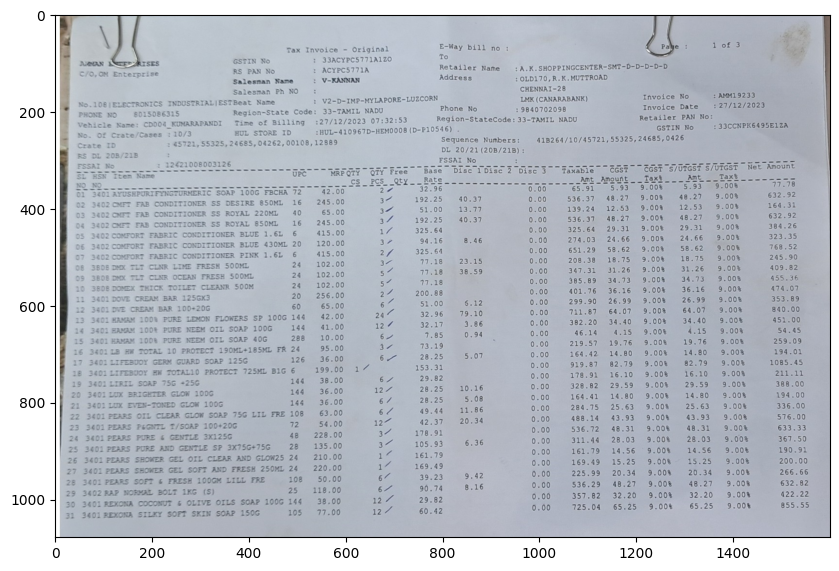

Looking for /Users/shivanggupta/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step
Extracted Text:
e
t
s


In [32]:
from keras_ocr.detection import Detector
from keras_ocr.recognition import Recognizer
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image
image_path = "bill_image.jpeg"
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Initialize the text detector
detector = Detector()

# Detect text regions in the image
detections = detector.detect([image_array])

# Display the regions where text was detected
plt.figure(figsize=(10, 10))
plt.imshow(image)
for detection in detections[0]:
    # Ensure the detection has at least four points
    if len(detection[0]) >= 4:
        plt.gca().add_patch(plt.Rectangle((detection[0][0], detection[0][1]), detection[0][2], detection[0][3],
                                          fill=False, color='red', linewidth=2))
plt.show()

# Initialize the text recognizer
recognizer = Recognizer()

# Extract text from the detected regions
prediction = recognizer.recognize(image_array)  # Corrected line

# Display the extracted text
print("Extracted Text:")
for text in prediction:
    print(text)


In [33]:
print(prediction)

ets


Looking for /Users/shivanggupta/.keras-ocr/craft_mlt_25k.h5
1/1 [==============================] - 8s 8s/step


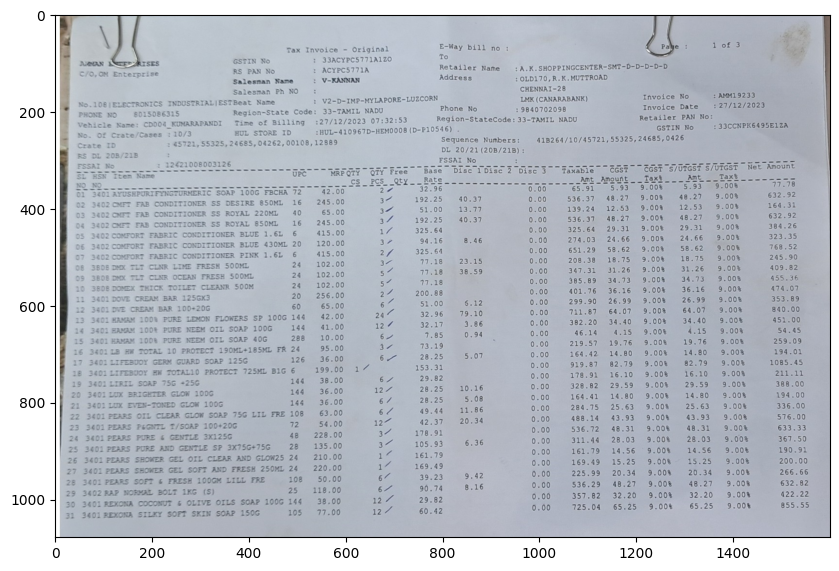

Looking for /Users/shivanggupta/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Extracted Text:





In [34]:
from keras_ocr.detection import Detector
from keras_ocr.recognition import Recognizer
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the image
image_path = "bill_image.jpeg"
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Initialize the text detector
detector = Detector()

# Detect text regions in the image
detections = detector.detect([image_array])

# Display the regions where text was detected
plt.figure(figsize=(10, 10))
plt.imshow(image)
for detection in detections[0]:
    # Ensure the detection has at least four points
    if len(detection[0]) >= 4:
        plt.gca().add_patch(plt.Rectangle((detection[0][0], detection[0][1]), detection[0][2], detection[0][3],
                                          fill=False, color='red', linewidth=2))
plt.show()

# Initialize the text recognizer
recognizer = Recognizer()

# Extract text from the detected regions
predictions = recognizer.recognize(image_array)

# Display the extracted text
print("Extracted Text:")
for prediction in predictions:
    extracted_text = ""
    for text in prediction:
        # Filter out short texts (adjust the length threshold as needed)
        if len(text[0]) > 2:
            extracted_text += text[0] + " "
    print(extracted_text.strip())


In [36]:
!pip install tabula-py


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 14.7 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near futu

In [37]:
import cv2
import pytesseract
import tabula
from PIL import Image

# Path to the Tesseract executable (update this with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the invoice image
image_path = "bill_image.jpeg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Tesseract to extract text
extracted_text = pytesseract.image_to_string(gray_image)

# Use tabula to extract tables
tables = tabula.read_pdf(image_path, pages='all', multiple_tables=True)

# Display the extracted text
print("Extracted Text:")
print(extracted_text)

# Display information about the detected tables
for idx, table in enumerate(tables, start=1):
    print(f"\nTable {idx}:")
    print(table)


TesseractNotFoundError: C:\Program Files\Tesseract-OCR\tesseract.exe is not installed or it's not in your PATH. See README file for more information.

In [1]:
!pip install pytesseract

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import cv2
import pytesseract
import tabula
from PIL import Image

def extract_invoice_data(image_path):
    # Use Tesseract to extract text
    extracted_text = pytesseract.image_to_string(Image.open(image_path))

    # Use tabula to extract tables
    tables = tabula.read_pdf(image_path, pages='all', multiple_tables=True)

    return extracted_text, tables

if __name__ == "__main__":
    # Replace with the path to your invoice image or PDF
    image_path = "bill_image.jpeg"

    text, extracted_tables = extract_invoice_data(image_path)

    # Display the extracted text
    print("Extracted Text:")
    print(text)

    # Display the extracted tables
    for i, table in enumerate(extracted_tables):
        print(f"Table {i + 1}:")
        print(table)


Error importing jpype dependencies. Fallback to subprocess.
No module named 'jpype'
Error from tabula-java:
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.





CalledProcessError: Command '['java', '-Djava.awt.headless=true', '-Dfile.encoding=UTF8', '-jar', '/usr/local/lib/python3.9/site-packages/tabula/tabula-1.0.5-jar-with-dependencies.jar', '--pages', 'all', '--guess', '--format', 'JSON', 'bill_image.jpeg']' returned non-zero exit status 1.

In [3]:
import subprocess
import pytesseract
from PIL import Image
import tabula
import os

def install_missing_packages():
    # Install missing Python packages
    subprocess.run(["pip", "install", "jpype1", "tabula-py"])

def extract_invoice_data(image_path):
    # Check and install missing packages
    try:
        import jpype
    except ImportError:
        install_missing_packages()

    # Use Tesseract to extract text
    extracted_text = pytesseract.image_to_string(Image.open(image_path))

    # Use tabula to extract tables
    try:
        tables = tabula.read_pdf(image_path, pages='all', multiple_tables=True)
    except Exception as e:
        print(f"Error extracting tables using Tabula: {e}")
        tables = None

    return extracted_text, tables

if __name__ == "__main__":
    # Replace with the path to your invoice image or PDF
    image_path = "bill_image.jpeg"
    
    # Display the extracted text
    text, extracted_tables = extract_invoice_data(image_path)
    
    print("Extracted Text:")
    print(text)
    
    if extracted_tables:
        print("Extracted Tables:")
        print(extracted_tables)


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 6.4 MB/s eta 0:00:00


  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Error from tabula-java:
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.





Error extracting tables using Tabula: Command '['java', '-Djava.awt.headless=true', '-Dfile.encoding=UTF8', '-jar', '/usr/local/lib/python3.9/site-packages/tabula/tabula-1.0.5-jar-with-dependencies.jar', '--pages', 'all', '--guess', '--format', 'JSON', 'bill_image.jpeg']' returned non-zero exit status 1.
Extracted Text:
Tax Invoice -~ Original E-Way bill no : . Pale : 1 of 3

GSTIN No : 33ACYPCS771A1Z0 To
RS PAN No : ACYPCS771A Retailer Name  : A.K.SHOPPINGCENTER-SMT-D-D-D-D-D
Salesman Name: V-KANNAN Address :OLD170,R.K.MUTTROAD
Salesman Ph NO : CHENNAI-28
CTRONICS INDUSTRIAL/ESTBeat Name : V2-D-IMP-MYLAPORE-LUZCORN LM (CANARABANK) Invoice No + AMM19233
PHONE NO 8015086315 Region-State Code: 33-TAMIL NADU Phone No : 9840702098 Invoice Date + 27/12/2023

Wehicle Name: CD004 _KUMARAPANDI Time of Billing :27/12/2023 07:32:53 Region-StateCode: 33-TAMIL NADU Retailer PAN No:
10/3 HUL STORE ID :HUL-410967D-HEM0008 (D-P10546) - GSTIN No : 33CCNPK6495E12A
: #5722, 55325, 24685, 04262, 00108, 1